In [1]:
import findspark
findspark.init()

import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
from datetime import date

In [2]:
spark = SparkSession.builder \
                    .master("local[4]") \
                    .config("spark.driver.memory", "4g") \
                    .getOrCreate()

sc = spark.sparkContext

In [3]:
df = spark.read.load("D://out/*.parquet")
df

DataFrame[hash: string, lock_time: int, size: int, received_time: bigint, total_input: double, total_output: double, block: int, vin: array<struct<prev_hash:string,index:int,vout:struct<address:array<string>,value:double,type:string>>>, vout: array<struct<address:array<string>,value:double,type:string>>]

In [4]:
def tx_date(s):
    x = date.fromtimestamp(s)
    return x
    
df = df.withColumn("date", udf(tx_date, returnType=DateType())("received_time"))
df = df.groupBy("date").sum("total_input").collect()

print(df)

[Row(date=datetime.date(2017, 1, 6), sum(total_input)=1915118.3836559155), Row(date=datetime.date(2015, 11, 2), sum(total_input)=797138.4163889299), Row(date=datetime.date(2013, 12, 4), sum(total_input)=944172.29974773), Row(date=datetime.date(2013, 12, 14), sum(total_input)=7926.246746210012), Row(date=datetime.date(2013, 12, 17), sum(total_input)=2332827.7395562404), Row(date=datetime.date(2017, 1, 4), sum(total_input)=2005408.567754902), Row(date=datetime.date(2018, 1, 14), sum(total_input)=484503.77795128035), Row(date=datetime.date(2013, 12, 9), sum(total_input)=1144571.304163287), Row(date=datetime.date(2018, 2, 1), sum(total_input)=25737.994012650033), Row(date=datetime.date(2018, 2, 4), sum(total_input)=36701.586702079956), Row(date=datetime.date(2013, 12, 18), sum(total_input)=1839480.5573738152), Row(date=datetime.date(2018, 1, 16), sum(total_input)=2175488.408814191), Row(date=datetime.date(2013, 12, 16), sum(total_input)=804374.0004184591), Row(date=datetime.date(2017, 1, 5

In [5]:
import pandas as pd
array1 = []
array2 = []
for i in range(len(df)):
    array1.append(str(df[i][0]))
    array2.append(str(df[i][1]))
s1 = pd.Series(array1)
s2 = pd.Series(array2)
s2 = s2.astype('double')

f = pd.DataFrame([s1,s2], index = ['Date','Vol']).transpose()

print(f)

          Date          Vol
0   2017-01-06  1.91512e+06
1   2015-11-02       797138
2   2013-12-04       944172
3   2013-12-14      7926.25
4   2013-12-17  2.33283e+06
5   2017-01-04  2.00541e+06
6   2018-01-14       484504
7   2013-12-09  1.14457e+06
8   2018-02-01        25738
9   2018-02-04      36701.6
10  2013-12-18  1.83948e+06
11  2018-01-16  2.17549e+06
12  2013-12-16       804374
13  2017-01-05  2.78197e+06
14  2015-08-21       314048
15  2018-02-02      62052.9
16  2017-05-21  1.98502e+06
17  2013-12-22       629593
18  2015-11-06  2.57513e+06
19  2015-08-17       980943
20  2018-02-08      82711.1
21  2015-11-08       124464
22  2015-08-19  1.78326e+06
23  2015-11-07       804854
24  2018-02-05       828517
25  2013-12-08  1.37585e+06
26  2017-05-19  2.77329e+06
27  2015-01-17  1.48002e+06
28  2015-01-15  2.52367e+06
29  2015-11-04   1.1037e+07
..         ...          ...
59  2015-01-04       974374
60  2017-05-17  2.68382e+06
61  2015-01-16   1.7743e+06
62  2017-07-21  1.79

In [6]:
btc = pd.read_csv("D://BTCUSD.csv", header = 1).rename(columns = {'Unnamed: 8' : 'volatility'}).reindex(columns = ['Date', 'Close', 'Volume From', 'volatility'])
tt = []
for i in range(btc['Date'].shape[0]-1):
    a = str(btc['Date'][i]).split('/')
    if len(a[1]) == 2:
        if len(a[2]) == 2:
            b = a[0] + '-' + a[1] + '-' + a[2]
        else:
            b = a[0] + '-' + a[1] + '-0' + a[2]
    else :
        if len(a[2]) == 2:
            b = a[0] + '-0' + a[1] + '-' + a[2]
        else:
            b = a[0] + '-' + a[1] + '-0' + a[2]
    tt.append(b)
c = pd.Series(tt)
btc['Date'] = c
btc['index'] = btc.index
print(btc)

            Date    Close  Volume From   volatility  index
0     2018-10-13  6200.80      52.5700  0.007197612      0
1     2018-10-12  6192.20    1675.0500  0.020822699      1
2     2018-10-11  6150.10    7094.1700  0.069286942      2
3     2018-10-10  6530.50    2486.3600  0.022461801      3
4     2018-10-09  6585.10    1365.6400  0.009533842      4
5     2018-10-08  6610.00    2498.5200  0.021744243      5
6     2018-10-07  6570.50    1022.6000  0.014618345      6
7     2018-10-06  6550.00     857.0100  0.010205558      7
8     2018-10-05  6580.10    2486.3900  0.026280708      8
9     2018-10-04  6547.40    2018.7400   0.02119696      9
10    2018-10-03  6463.90    5144.8800  0.019052908     10
11    2018-10-02  6500.00    3054.7900  0.024601074     11
12    2018-10-01  6572.60    1863.9100  0.021720158     12
13    2018-09-30  6604.10    1173.0400  0.018655019     13
14    2018-09-29  6582.70    2152.4400   0.02608103     14
15    2018-09-28  6622.30    4522.3200  0.040101908     

In [7]:
fff = pd.merge(f,btc,on = 'Date', how = 'inner')
fff['Vol'] = fff['Vol'].astype('float')
fff['volatility'] = fff['volatility'].astype('float')
fff = fff.sort_values(by = ['index'], ascending = False)
fff = fff.drop(['index'], axis = 1)
print(fff)

          Date           Vol     Close  Volume From  volatility
40  2013-12-03  2.557191e+05   1047.11        25.07    0.078278
1   2013-12-04  9.441723e+05   1079.93        40.37    0.129983
46  2013-12-05  1.263913e+06   1032.05        64.74    0.240817
57  2013-12-06  1.080887e+06    858.65        60.34    0.218522
27  2013-12-07  1.997852e+06    713.49       124.15    0.444032
17  2013-12-08  1.375850e+06    779.00        48.49    0.174688
5   2013-12-09  1.144571e+06    899.73        61.35    0.161193
64  2013-12-10  5.900848e+05    954.64        69.80    0.081613
34  2013-12-11  6.040350e+05    883.78        43.06    0.173225
37  2013-12-12  1.089151e+04    873.00         7.66    0.070242
2   2013-12-14  7.926247e+03    862.17        12.29    0.040858
26  2013-12-15  4.922726e+04    869.84        35.20    0.075057
8   2013-12-16  8.043740e+05    707.00        64.13    0.280739
3   2013-12-17  2.332828e+06    702.00        63.68    0.119390
6   2013-12-18  1.839481e+06    528.00  

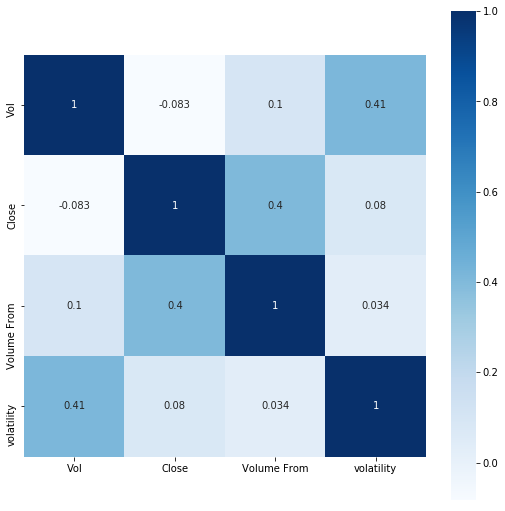

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def corrheat(df):
    dfData = df.corr()
    plt.subplots(figsize=(9, 9)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.show()
corrheat(fff)

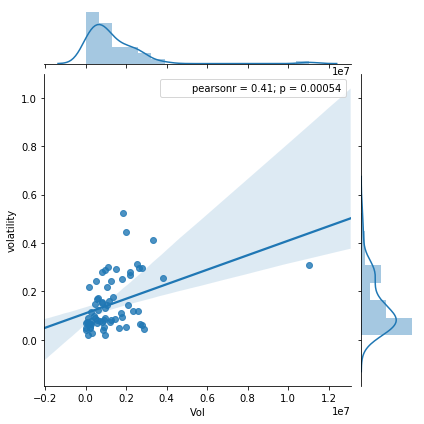

In [9]:
sns.jointplot(x="Vol", y="volatility", data=fff, kind = 'reg')
plt.show()

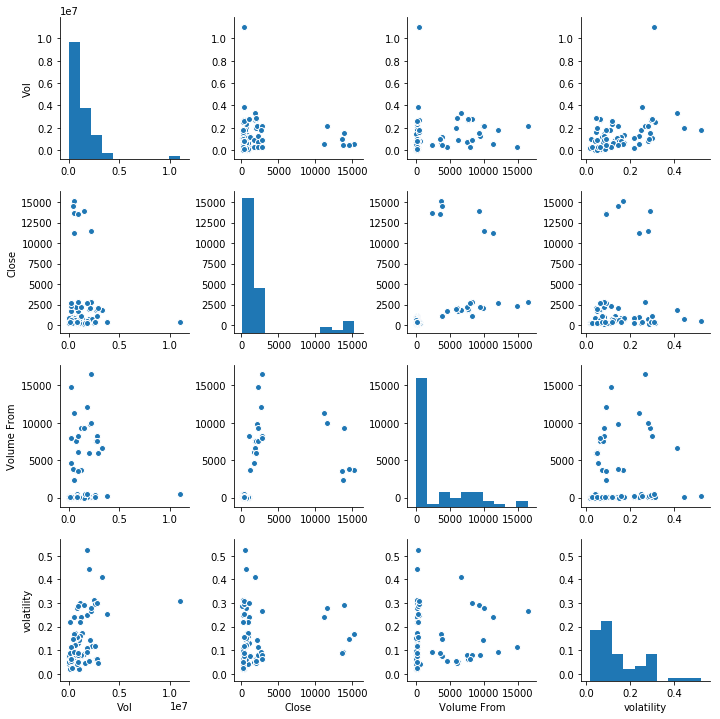

In [10]:
sns.pairplot(fff)
plt.show()

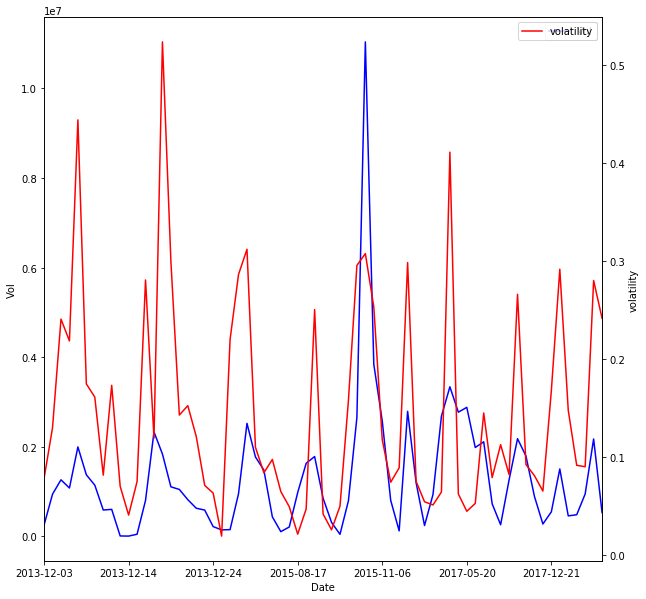

In [11]:
ax=plt.subplot(111)
fff.plot(x = 'Date', y = 'Vol', ax=ax, color='b', figsize = (10,10))
ax.set_xlabel('Date')
ax.set_ylabel('Vol')

ax2 = ax.twinx()
fff.plot(x = 'Date', y = 'volatility', ax=ax2, color='r', figsize = (10,10))
ax2.set_ylabel('volatility')
plt.show()